In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/processed/Brazil/census_data/2010/weightening_area/universal_results/states/RS/'

In [3]:
categorie = 'Pessoa.csv'
data = pd.read_csv(path+categorie)
data.head()

,Cod_ap,CD_GEOCODM,NM_MUNICIP,V001,V002,V003,V004,V005,V006,V007,...,V126,V127,V128,V129,V130,V131,V132,V133,V134,Unnamed: 136
0,4.300034e+12,4300034,ACEGUÁ,2303,2302,1119,103,625,188,31,...,0,0,0,0,0,0,0,0,0,0.0
1,4.300059e+12,4300059,ÁGUA SANTA,1879,1852,998,19,606,92,15,...,2,0,1,0,0,1,0,0,0,0.0
2,4.300109e+12,4300109,AGUDO,8349,8239,3878,671,2092,650,116,...,3,3,1,0,0,0,1,0,0,0.0
3,4.300208e+12,4300208,AJURICABA,3585,3559,1801,257,1007,177,43,...,1,0,1,1,0,1,0,0,0,0.0
4,4.300307e+12,4300307,ALECRIM,3512,3495,1891,181,940,223,25,...,2,0,2,1,0,1,0,1,1,0.0


In [4]:
columns = data.columns.values
constant_columns = (data != data.iloc[0]).any() == False
to_drop = columns[constant_columns].tolist()
data.drop(to_drop, axis=1, inplace = True)
to_drop

['Unnamed: 136']

In [5]:
data_no_geo = data.drop(['Cod_ap', 'CD_GEOCODM', 'NM_MUNICIP'], axis=1)
sum(data_no_geo.duplicated())

0

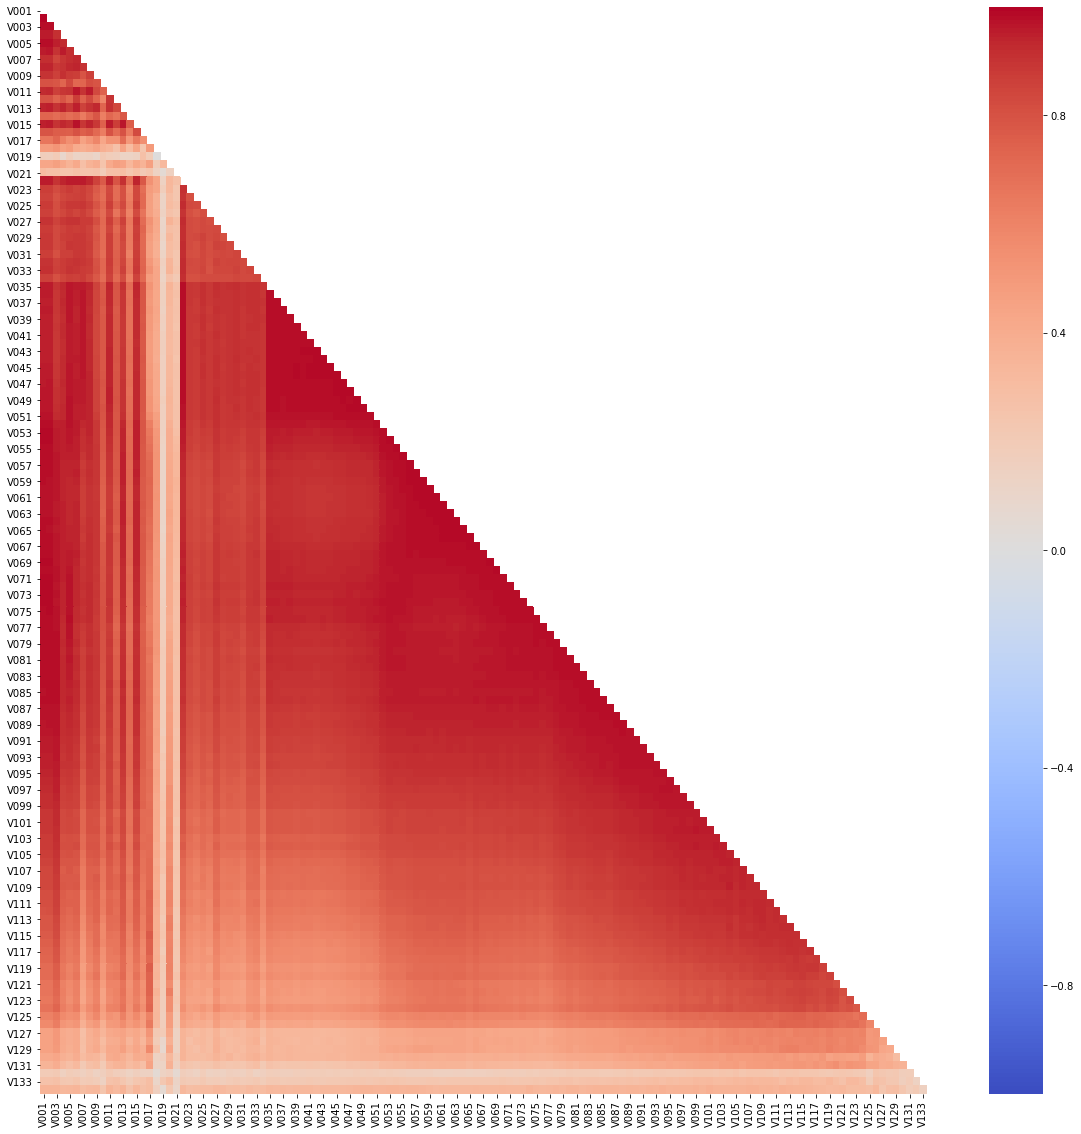

In [6]:
data_corr = data_no_geo.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(data_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

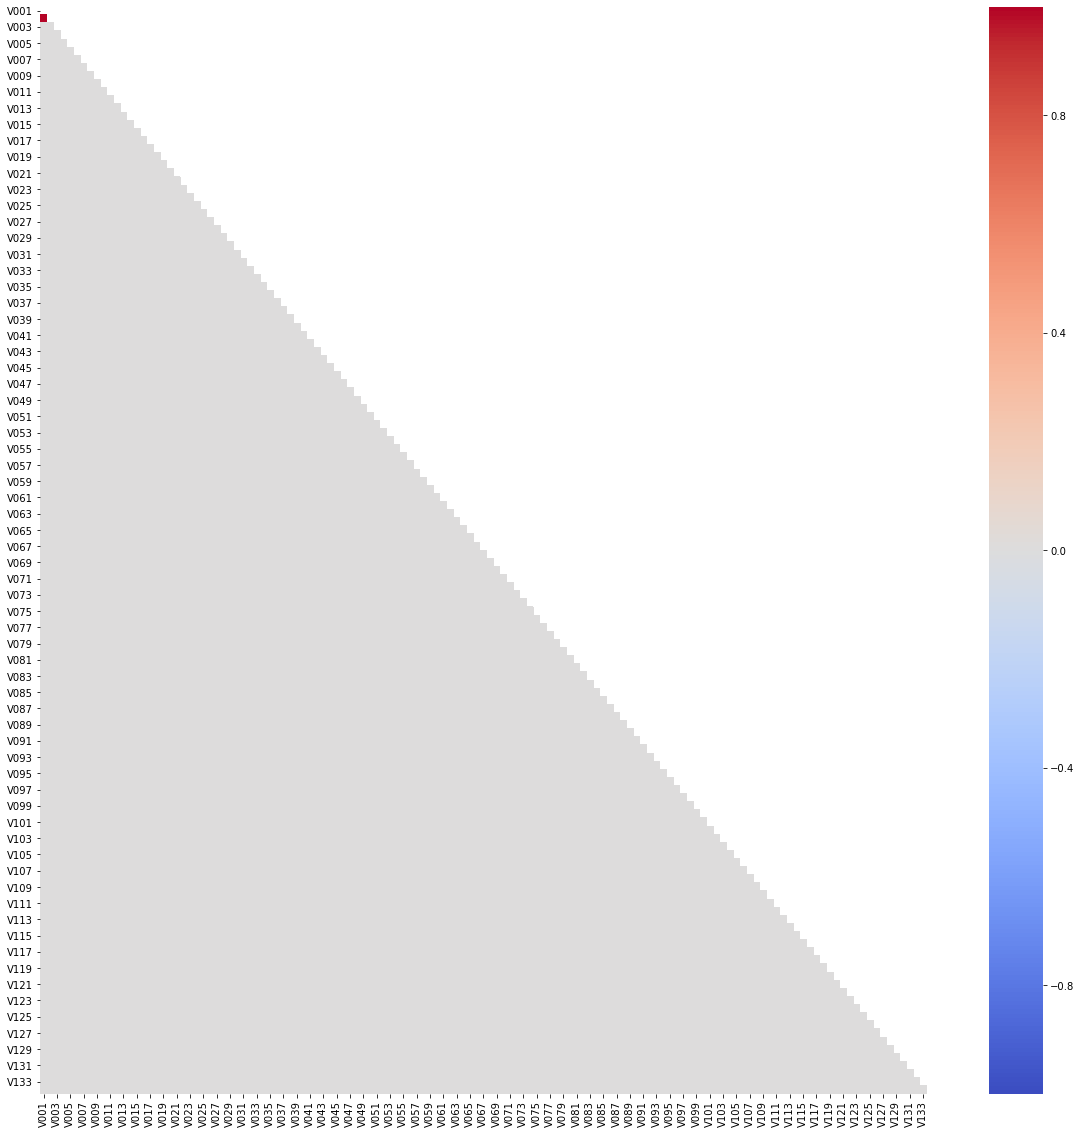

In [7]:
corr = data_corr.copy()
corr[np.abs(corr)<=0.99] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

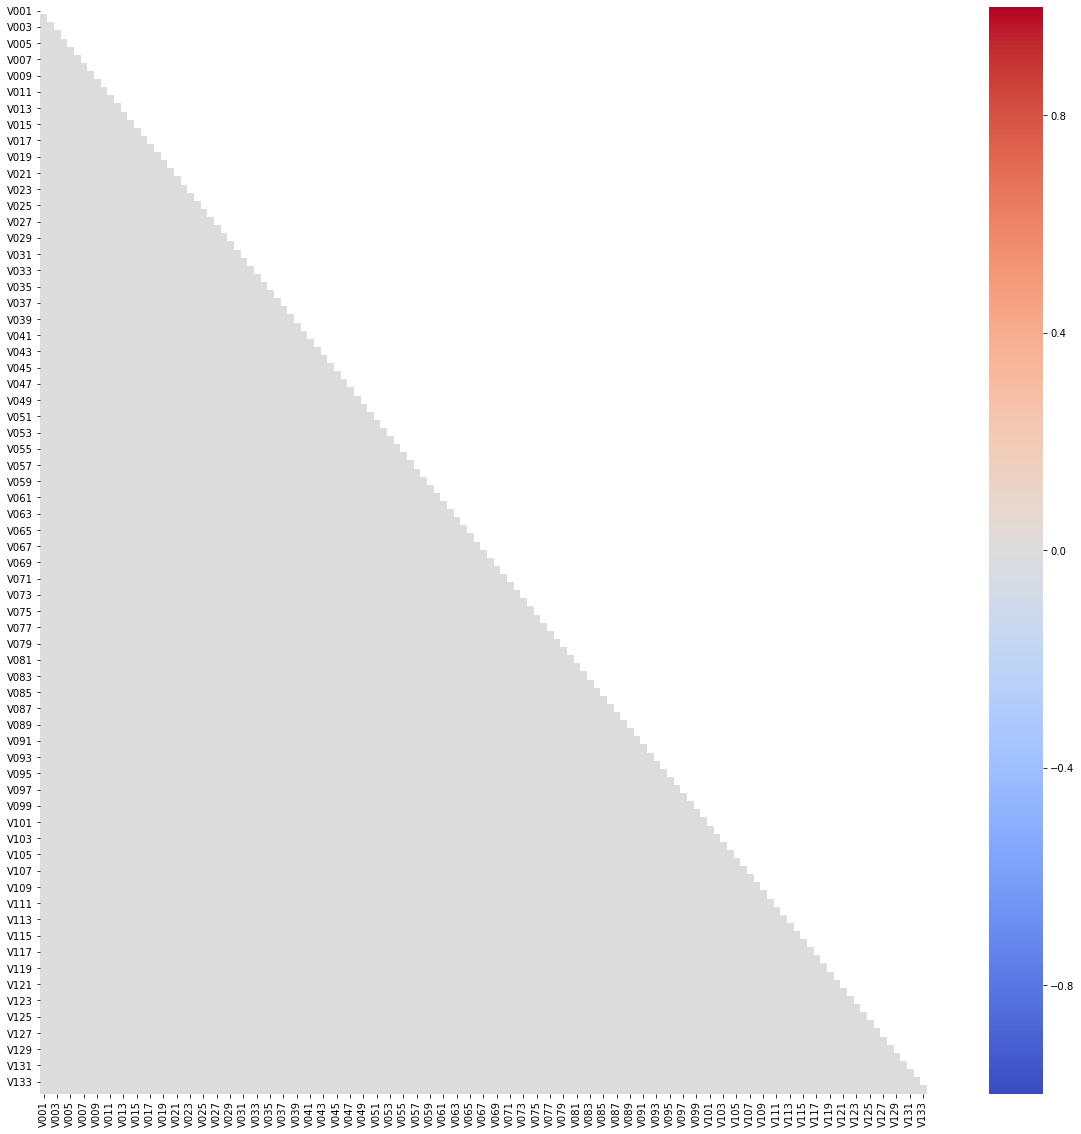

In [8]:
corr = data_corr.copy()
corr[np.abs(corr)< 1] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);